In [145]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

In [146]:

df1 = pd.read_csv("Prices__.csv")
df1.shape

(8523, 12)

In [147]:
df = df1.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [148]:
df[df["Item_Weight"].isnull()]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
7              FDP10          NaN          Low Fat         0.127470   
18             DRI11          NaN          Low Fat         0.034238   
21             FDW12          NaN          Regular         0.035400   
23             FDC37          NaN          Low Fat         0.057557   
29             FDC14          NaN          Regular         0.072222   
...              ...          ...              ...              ...   
8485           DRK37          NaN          Low Fat         0.043792   
8487           DRG13          NaN          Low Fat         0.037006   
8488           NCN14          NaN          Low Fat         0.091473   
8490           FDU44          NaN          Regular         0.102296   
8504           NCN18          NaN          Low Fat         0.124111   

                  Item_Type  Item_MRP Outlet_Identifier  \
7               Snack Foods  107.7622            OUT027   
18              Hard Drinks  113.2834            OUT027   
21             Baking Goods  144.5444            OUT027   
23             Baking Goods  107.6938            OUT019   
29                   Canned   43.6454            OUT019   
...                     ...       ...               ...   
8485            Soft Drinks  189.0530            OUT027   
8487            Soft Drinks  164.7526            OUT027   
8488                 Others  184.6608            OUT027   
8490  Fruits and Vegetables  162.3552            OUT019   
8504              Household  111.7544            OUT027   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
7                          1985      Medium               Tier 3   
18                         1985      Medium               Tier 3   
21                         1985      Medium               Tier 3   
23                         1985       Small               Tier 1   
29                         1985       Small               Tier 1   
...                         ...         ...                  ...   
8485                       1985      Medium               Tier 3   
8487                       1985      Medium               Tier 3   
8488                       1985      Medium               Tier 3   
8490                       1985       Small               Tier 1   
8504                       1985      Medium               Tier 3   

            Outlet_Type  Item_Outlet_Sales  
7     Supermarket Type3          4022.7636  
18    Supermarket Type3          2303.6680  
21    Supermarket Type3          4064.0432  
23        Grocery Store           214.3876  
29        Grocery Store           125.8362  
...                 ...                ...  
8485  Supermarket Type3          6261.8490  
8487  Supermarket Type3          4111.3150  
8488  Supermarket Type3          2756.4120  
8490      Grocery Store           487.3656  
8504  Supermarket Type3          4138.6128  

[1463 rows x 12 columns]

In [149]:
df.shape

(8523, 12)

Frequency Table:
 Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

Relative Frequency Table:
 Item_Fat_Content
Low Fat    0.597090
Regular    0.338965
LF         0.037076
reg        0.013728
low fat    0.013141
Name: proportion, dtype: float64


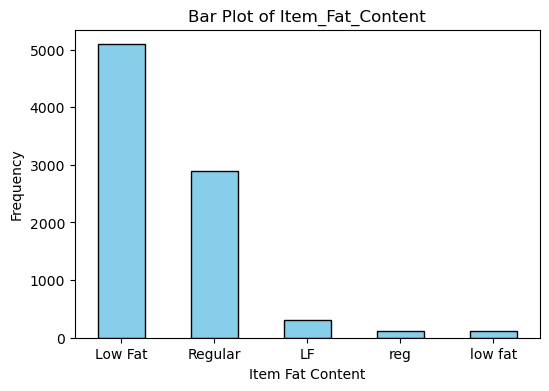

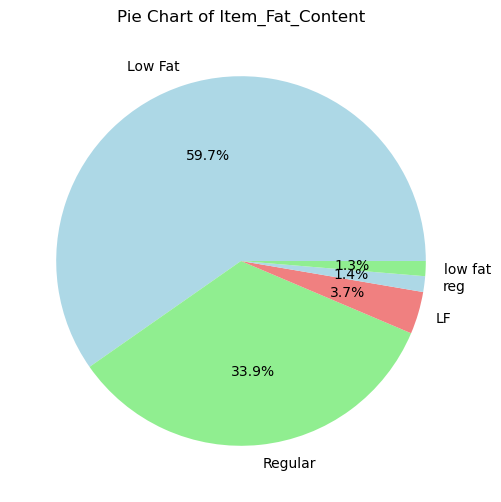

In [150]:
freq_table = df['Item_Fat_Content'].value_counts()
print("Frequency Table:\n", freq_table)

# Relative Frequency Table
relative_freq_table = df['Item_Fat_Content'].value_counts(normalize=True)
print("\nRelative Frequency Table:\n", relative_freq_table)

# Bar Plot
plt.figure(figsize=(6,4))
freq_table.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Bar Plot of Item_Fat_Content')
plt.xlabel('Item Fat Content')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

# Pie Chart
plt.figure(figsize=(6,6))
freq_table.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Pie Chart of Item_Fat_Content')
plt.ylabel('')  # Hide y-label
plt.show()

In [151]:
df.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [152]:
df["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

##### Standardizing `Item_Fat_Content`
The `Item_Fat_Content` column contains inconsistencies in category names such as different capitalizations and abbreviations (`"low fat"`, `"lf"`, `"reg"`, etc.)

In [153]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].str.lower().replace({
    'low fat': 'Low Fat',
    'lf': 'Low Fat',
    'reg': 'Regular',
    'regular' : 'Regular'
})
df["Item_Fat_Content"].value_counts()


Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [154]:
missing_counts = df["Item_Weight"].isnull().groupby(df["Item_Type"]).sum()

# Display the result
print(missing_counts.sort_values())

Item_Type
Seafood                   13
Starchy Foods             18
Breakfast                 21
Hard Drinks               31
Others                    32
Breads                    47
Soft Drinks               71
Meat                      88
Health and Hygiene        90
Canned                   110
Baking Goods             112
Dairy                    116
Frozen Foods             138
Household                151
Snack Foods              212
Fruits and Vegetables    213
Name: Item_Weight, dtype: int64


In [155]:
df["Item_Type"].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [156]:
df[df["Outlet_Identifier"]=="OUT010"].head(20)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
3             FDX07       19.200          Regular         0.000000   
28            FDE51        5.925          Regular         0.161467   
30            FDV38       19.250          Low Fat         0.170349   
45            FDM39        6.420          Low Fat         0.089499   
65            FDC46       17.700          Low Fat         0.195068   
90            FDW20       20.750          Low Fat         0.040421   
122           FDB14       20.250          Regular         0.171939   
133           FDS52        8.890          Low Fat         0.009163   
139           NCN07       18.500          Low Fat         0.056816   
174           FDI32       17.700          Low Fat         0.291865   
175           FDR47       17.850          Low Fat         0.000000   
177           NCU05       11.800          Low Fat         0.098312   
205           FDF24       15.500          Regular         0.042465   
209           FDX40       12.850          Low Fat         0.165694   
214           NCZ54       14.650          Low Fat         0.000000   
215           FDE10        6.670          Regular         0.150555   
216           FDR44        6.110          Regular         0.000000   
217           FDP28       13.650          Regular         0.134976   
278           FDK21        7.905          Low Fat         0.016759   
286           FDE08       18.200          Low Fat         0.082551   

                 Item_Type  Item_MRP Outlet_Identifier  \
3    Fruits and Vegetables  182.0950            OUT010   
28                   Dairy   45.5086            OUT010   
30                   Dairy   55.7956            OUT010   
45                   Dairy  178.1002            OUT010   
65             Snack Foods  185.4266            OUT010   
90   Fruits and Vegetables  122.1730            OUT010   
122                 Canned   92.5120            OUT010   
133           Frozen Foods  101.7016            OUT010   
139                 Others  132.1284            OUT010   
174  Fruits and Vegetables  115.1834            OUT010   
175                 Breads  196.5794            OUT010   
177     Health and Hygiene   81.4618            OUT010   
205           Baking Goods   81.5934            OUT010   
209           Frozen Foods   39.7164            OUT010   
214              Household  161.5552            OUT010   
215            Snack Foods  130.0626            OUT010   
216  Fruits and Vegetables  131.2968            OUT010   
217           Frozen Foods  260.0936            OUT010   
278            Snack Foods  250.4408            OUT010   
286  Fruits and Vegetables  147.3734            OUT010   

     Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
3                         1998         NaN               Tier 3   
28                        1998         NaN               Tier 3   
30                        1998         NaN               Tier 3   
45                        1998         NaN               Tier 3   
65                        1998         NaN               Tier 3   
90                        1998         NaN               Tier 3   
122                       1998         NaN               Tier 3   
133                       1998         NaN               Tier 3   
139                       1998         NaN               Tier 3   
174                       1998         NaN               Tier 3   
175                       1998         NaN               Tier 3   
177                       1998         NaN               Tier 3   
205                       1998         NaN               Tier 3   
209                       1998         NaN               Tier 3   
214                       1998         NaN               Tier 3   
215                       1998         NaN               Tier 3   
216                       1998         NaN               Tier 3   
217                       1998         NaN               Tier 3   
278                       1998         Na

## Handling missing values 
1) we have two types of missing values:
- missing values in OUTLET_SIZE 
- missing values in ITEM_weight

#### Handling Missing Values in `Item_Weight`
We will fill the missing values in the `Item_Weight` column by computing the **median weight** for each unique category in the `Item_Type` column. 

This ensures that the missing values are replaced with a more relevant and meaningful estimate rather than using a single global median. 

In [157]:
df['Item_Weight'] = df.groupby('Item_Type')['Item_Weight'].transform(lambda x: x.fillna(x.median()))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### Handling Missing Values in `Outlet_Size`
To maintain consistency, we will replace all missing (`NaN`) values in the `Outlet_Size` column with `"Unknown"`. This ensures that no empty values remain, and every outlet has a defined size category.

In [158]:

df['Outlet_Size'] = df['Outlet_Size'].fillna("Unknown")

##

In [159]:
df["Outlet_Size"].value_counts()

Outlet_Size
Medium     2793
Unknown    2410
Small      2388
High        932
Name: count, dtype: int64

In [160]:
df

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998     Unknown               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002     Unknown               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 12 columns]

In [161]:

df['Outlet_Establishment_Year'] = pd.to_datetime(df['Outlet_Establishment_Year'], format='%Y')

# Calculate the number of years since establishment
df['Outlet_Age'] = datetime.now().year - df['Outlet_Establishment_Year'].dt.year


In [162]:
df['Item_Code'] = df['Item_Identifier'].str[:3]

# Display the first few rows of the new feature
print("Item Code:")
print(df[['Item_Identifier', 'Item_Code']].head())

Item Code:
  Item_Identifier Item_Code
0           FDA15       FDA
1           DRC01       DRC
2           FDN15       FDN
3           FDX07       FDX
4           NCD19       NCD


In [163]:
df["no_of_items"] = df["Item_Outlet_Sales"]/df["Item_MRP"]

In [164]:
vis_min = df['Item_Visibility'].min()
vis_q1 = df['Item_Visibility'].quantile(0.33)
vis_q2 = df['Item_Visibility'].quantile(0.66)
vis_max = df['Item_Visibility'].max()

df['Visibility_Category'] = pd.cut(
    df['Item_Visibility'],
    bins=[vis_min, vis_q1, vis_q2, vis_max],
    labels=['Low', 'Medium', 'High'],
    include_lowest=True
)

# Display the first few rows of the new feature
print("Visibility Category:")
print(df[['Item_Visibility', 'Visibility_Category']].head())

Visibility Category:
   Item_Visibility Visibility_Category
0         0.016047                 Low
1         0.019278                 Low
2         0.016760                 Low
3         0.000000                 Low
4         0.000000                 Low


In [165]:
mrp_min = df['Item_MRP'].min()
mrp_q1 = df['Item_MRP'].quantile(0.33)
mrp_q2 = df['Item_MRP'].quantile(0.66)
mrp_max = df['Item_MRP'].max()

df['MRP_Category'] = pd.cut(
    df['Item_MRP'],
    bins=[mrp_min, mrp_q1, mrp_q2, mrp_max],
    labels=['Low', 'Medium', 'High'],
    include_lowest=True
)

# Display the first few rows of the new feature
print("MRP Category:")
print(df[['Item_MRP', 'MRP_Category']].head())

MRP Category:
   Item_MRP MRP_Category
0  249.8092         High
1   48.2692          Low
2  141.6180       Medium
3  182.0950         High
4   53.8614          Low


In [166]:
df.to_csv("output.csv", index=False)

print("Data has been successfully saved to output.csv")

Data has been successfully saved to output.csv


## UNIVARITE ANALYSIS AND BIVARIATE ANALYSIS

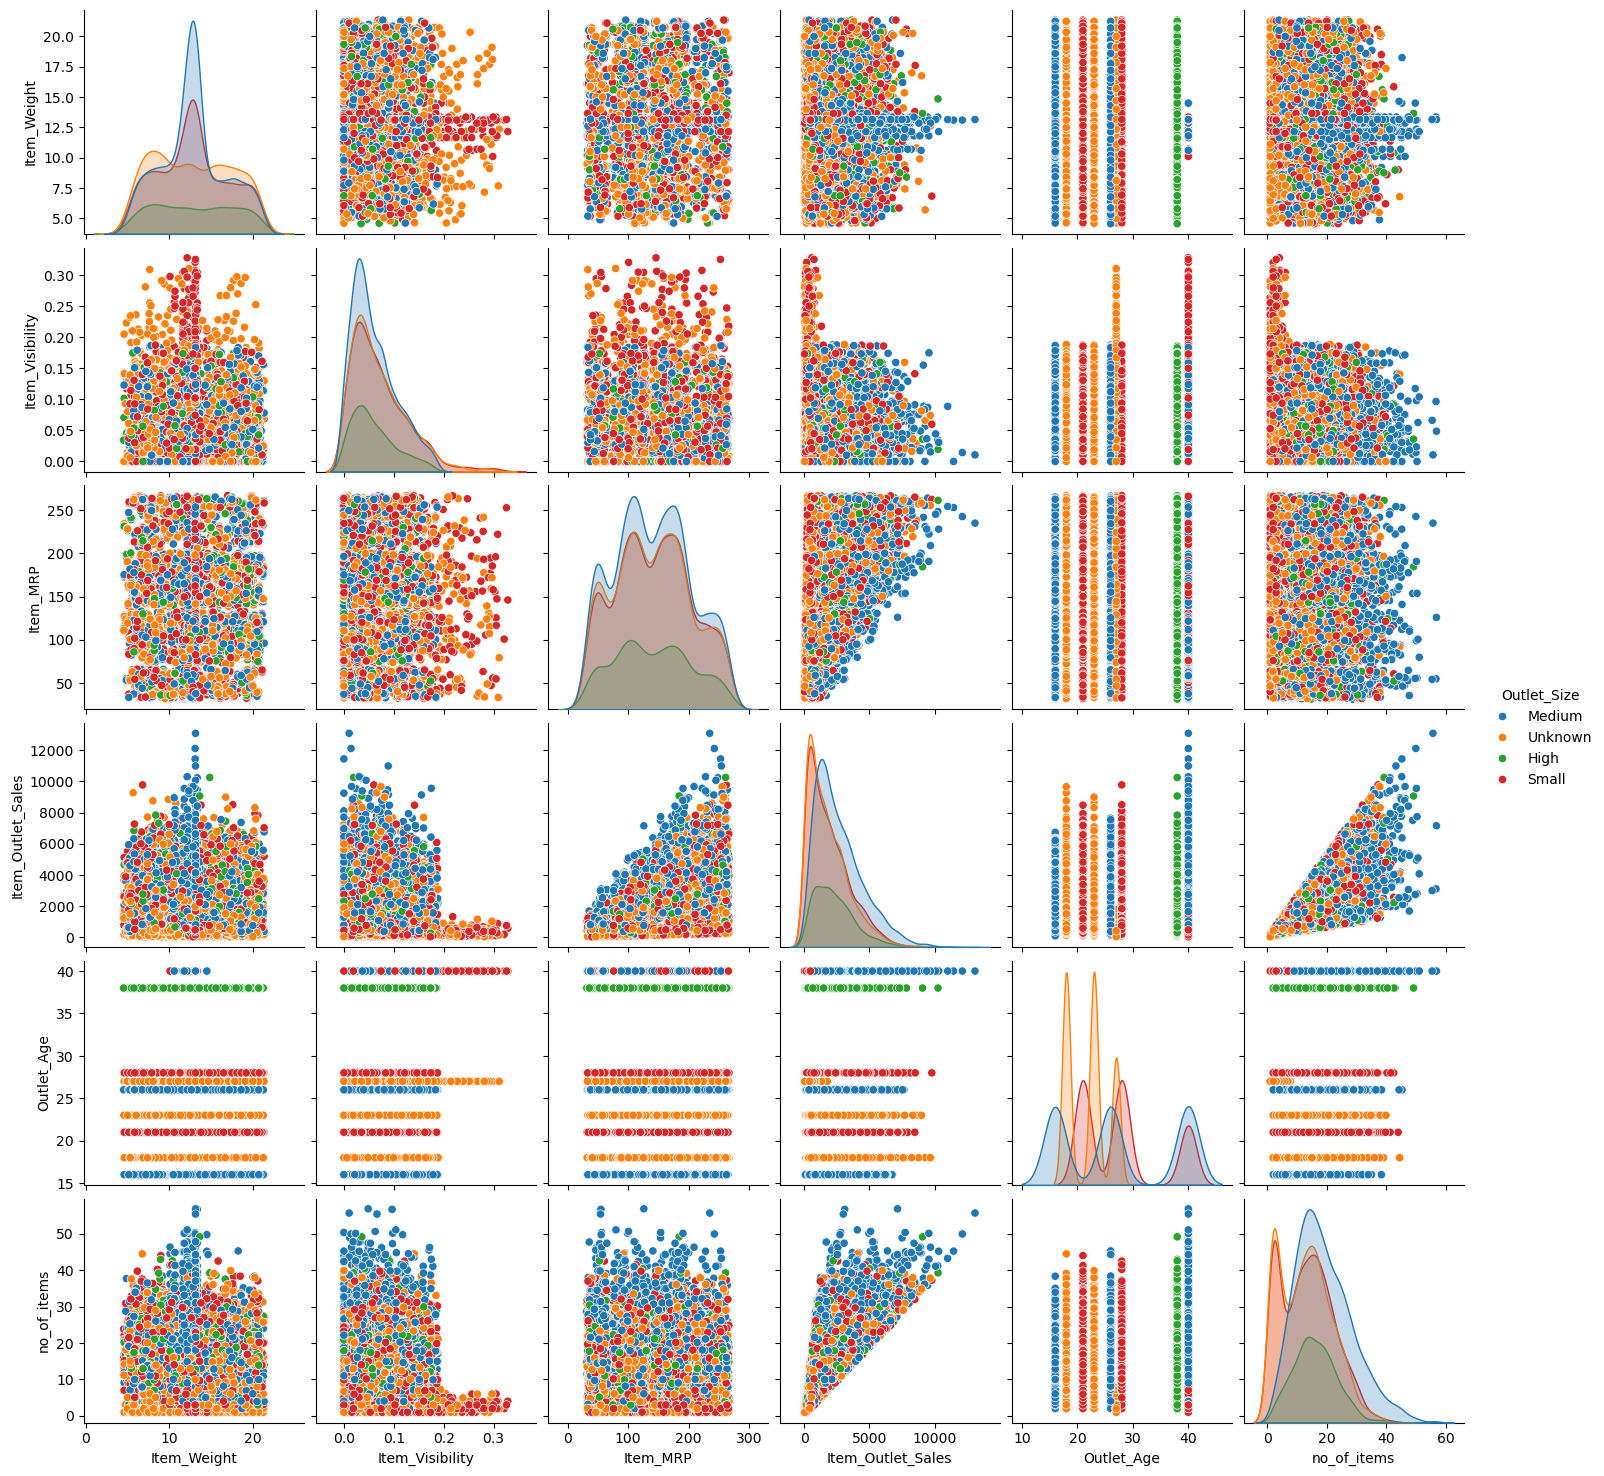

In [167]:
sns.pairplot(df,kind="scatter",hue="Outlet_Size")

In [168]:
df["Outlet_Age"].value_counts()

Outlet_Age
40    1463
38     932
26     930
28     930
21     930
23     929
16     928
18     926
27     555
Name: count, dtype: int64

<Axes: ylabel='Item_Visibility'>

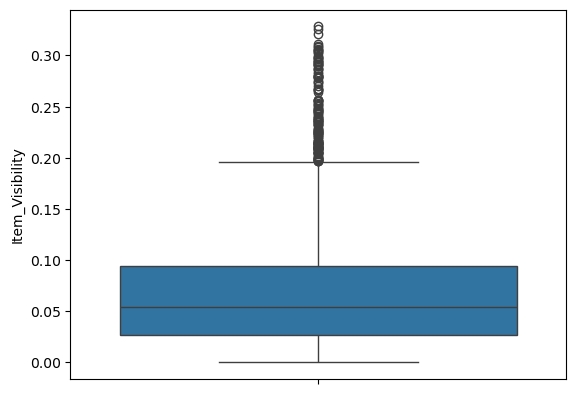

In [169]:
sns.boxplot(df["Item_Visibility"])

In [170]:
df

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

     Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                   1999-01-01      Medium               Tier 1   
1                   2009-01-01      Medium               Tier 3   
2                   1999-01-01      Medium               Tier 1   
3                   1998-01-01     Unknown               Tier 3   
4                   1987-01-01        High               Tier 3   
...                        ...         ...                  ...   
8518                1987-01-01        High               Tier 3   
8519                2002-01-01     Unknown               Tier 2   
8520                2004-01-01       Small               Tier 2   
8521                2009-01-01      Medium               Tier 3   
8522                1997-01-01       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  Outlet_Age Item_Code  no_of_items  \
0     Supermarket Type1          3735.1380          26       FDA    14.951963   
1     Supermarket Type2           443.4228          16       DRC     9.186454   
2     Supermarket Type1          2097.2700          26       FDN    14.809346   
3         Grocery Store           732.3800          27       FDX     4.021967   
4     Supermarket Type1           994.7052          38       NCD    18.467868   
...                 ...                ...         ...       ...          ...   
8518  Supermarket Type1          2778.3834          38       FDF    12.951520   
8519  Supermarket Type1           549.2850          23       FDS     5.078589   
8520  Supermarket Type1          1193.1136          21       NCJ    14.016447   
8521  Supermarket Type2          1845.5976          16       FDN    17.895281   
8522  Supermarket Type1           765.6700          28       DRG    10.145759   

     Visibility_Category MRP_Category  
0                    Low         High  
1                    Low          Low  
2                    Low       Medium  
3                    Low         High  
4                    Low          Low  
...                  ...          ...  
8518              Medium         High  
8519              Medium       Medium  
8520              Medium          Low  
8521                High          Low  
8522              Medium          Low  

[8523 rows x 17 columns]

In [171]:
df[df["Item_Visibility"]>0.23]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
49             FDS02       13.350          Regular         0.255395   
83             NCL18       13.150          Low Fat         0.293418   
108            DRE60       11.800          Low Fat         0.278974   
174            FDI32       17.700          Low Fat         0.291865   
434            FDW27       12.350          Regular         0.264125   
...              ...          ...              ...              ...   
7949           FDK25       10.695          Regular         0.274592   
8194           FDY15       13.350          Regular         0.299098   
8215           FDZ16       12.850          Regular         0.279887   
8273           FDD14       12.150          Low Fat         0.297313   
8345           FDY28       12.850          Regular         0.266397   

                  Item_Type  Item_MRP Outlet_Identifier  \
49                    Dairy  196.8794            OUT019   
83                Household  194.6136            OUT019   
108             Soft Drinks  225.3720            OUT019   
174   Fruits and Vegetables  115.1834            OUT010   
434                    Meat  155.7314            OUT019   
...                     ...       ...               ...   
7949              Breakfast  167.8474            OUT019   
8194                  Dairy  157.8630            OUT019   
8215           Frozen Foods  193.1478            OUT019   
8273                 Canned  185.4266            OUT019   
8345           Frozen Foods  215.6218            OUT019   

     Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
49                  1985-01-01       Small               Tier 1   
83                  1985-01-01       Small               Tier 1   
108                 1985-01-01       Small               Tier 1   
174                 1998-01-01     Unknown               Tier 3   
434                 1985-01-01       Small               Tier 1   
...                        ...         ...                  ...   
7949                1985-01-01       Small               Tier 1   
8194                1985-01-01       Small               Tier 1   
8215                1985-01-01       Small               Tier 1   
8273                1985-01-01       Small               Tier 1   
8345                1985-01-01       Small               Tier 1   

        Outlet_Type  Item_Outlet_Sales  Outlet_Age Item_Code  no_of_items  \
49    Grocery Store           780.3176          40       FDS     3.963429   
83    Grocery Store           583.2408          40       NCL     2.996917   
108   Grocery Store           679.1160          40       DRE     3.013311   
174   Grocery Store           345.5502          27       FDI     3.000000   
434   Grocery Store           155.1314          40       FDW     0.996147   
...             ...                ...         ...       ...          ...   
7949  Grocery Store           336.8948          40       FDK     2.007149   
8194  Grocery Store           469.3890          40       FDY     2.973395   
8215  Grocery Store           387.4956          40       FDZ     2.006213   
8273  Grocery Store           368.8532          40       FDD     1.989214   
8345  Grocery Store           641.1654          40       FDY     2.973565   

     Visibility_Category MRP_Category  
49                  High         High  
83                  High         High  
108                 High         High  
174                 High       Medium  
434                 High       Medium  
...                  ...          ...  
7949                High       Medium  
8194                High       Medium  
8215                High         High  
8273                High         High  
8345                High         High  

[81 rows x 17 columns]

<Axes: ylabel='Item_Outlet_Sales'>

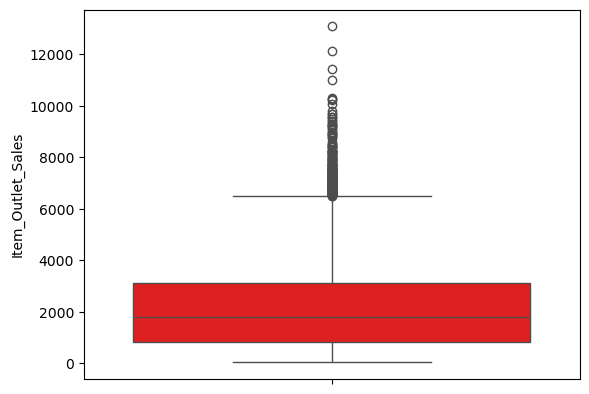

In [172]:

sns.boxplot(df["Item_Outlet_Sales"],color= "RED" )

In [174]:
crosstab1= pd.crosstab(df['Outlet_Location_Type'], df['Outlet_Type'])
crosstab2= pd.crosstab(df['Visibility_Category'], df['Item_Type'])
print(crosstab1)
print(crosstab2)

Outlet_Type           Grocery Store  Supermarket Type1  Supermarket Type2  \
Outlet_Location_Type                                                        
Tier 1                          528               1860                  0   
Tier 2                            0               2785                  0   
Tier 3                          555                932                928   

Outlet_Type           Supermarket Type3  
Outlet_Location_Type                     
Tier 1                                0  
Tier 2                                0  
Tier 3                              935  
Item_Type            Baking Goods  Breads  Breakfast  Canned  Dairy  \
Visibility_Category                                                   
Low                           186      80         17     249    182   
Medium                        222      85         46     159    252   
High                          240      86         47     241    248   

Item_Type            Frozen Foods  Fruits and Ve

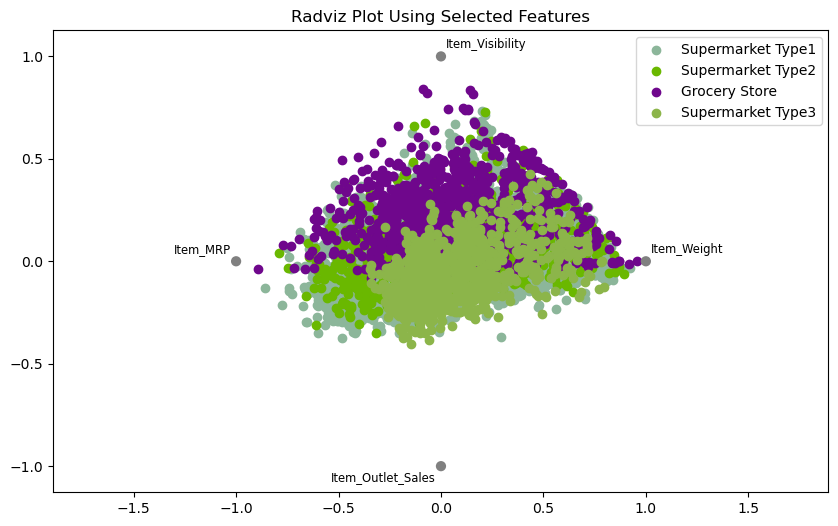

In [175]:
from pandas.plotting import radviz
import matplotlib.pyplot as plt

# Select a subset of numerical features and include Outlet_Type as the class column.
radviz_data = df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales', 'Outlet_Type']]

plt.figure(figsize=(10,6))
radviz(radviz_data, 'Outlet_Type')
plt.title("Radviz Plot Using Selected Features")
plt.show()

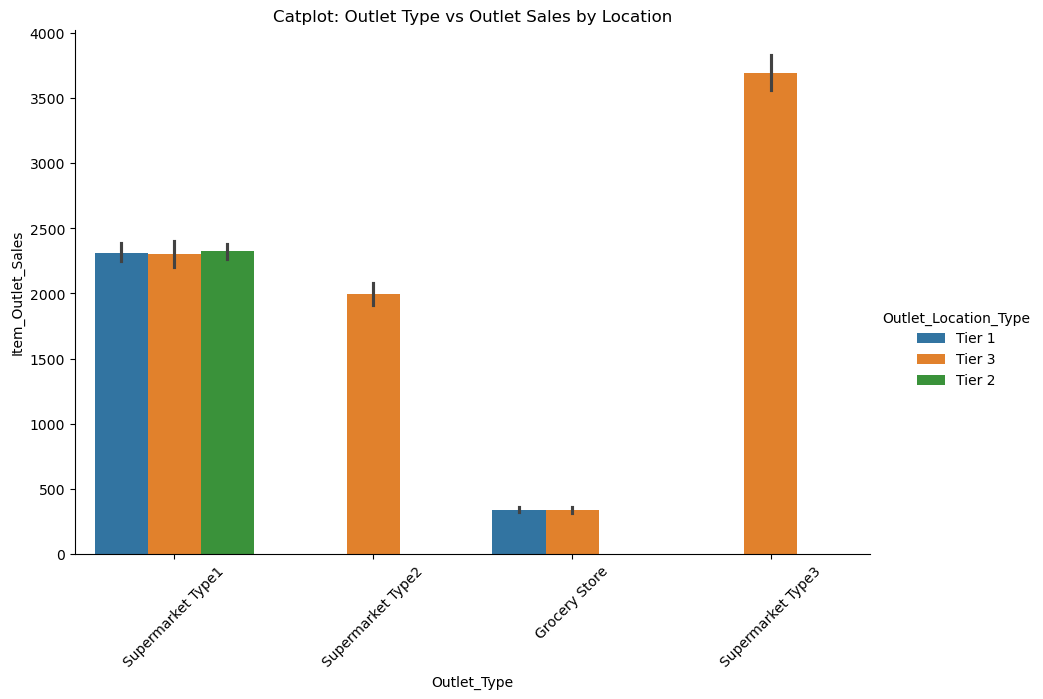

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize average sales across Outlet_Type with breakdown by Outlet_Location_Type.
sns.catplot(x="Outlet_Type", y="Item_Outlet_Sales", hue="Outlet_Location_Type", 
            data=df, kind="bar", height=6, aspect=1.5)
plt.title("Catplot: Outlet Type vs Outlet Sales by Location")
plt.xticks(rotation=45)
plt.show()

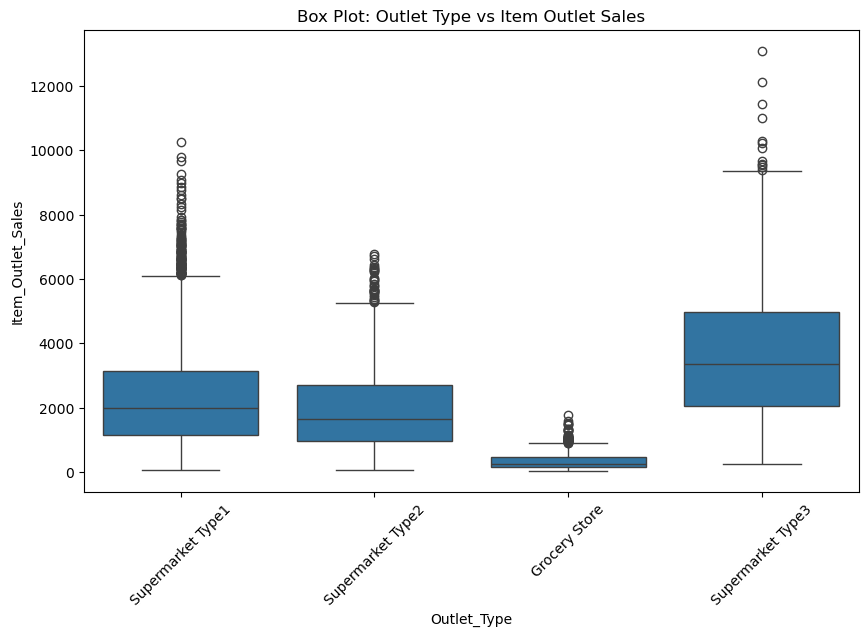

In [178]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Outlet_Type'], y=df['Item_Outlet_Sales'])
plt.xticks(rotation=45)
plt.title("Box Plot: Outlet Type vs Item Outlet Sales")
plt.show()

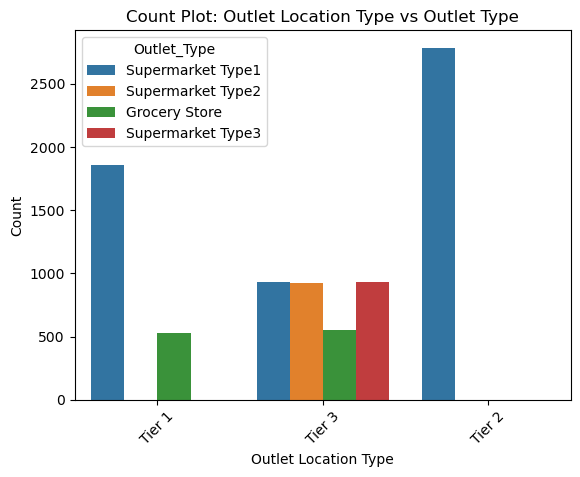

In [179]:

sns.countplot(x=df['Outlet_Location_Type'], hue=df['Outlet_Type'])
plt.title("Count Plot: Outlet Location Type vs Outlet Type")
plt.xlabel("Outlet Location Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

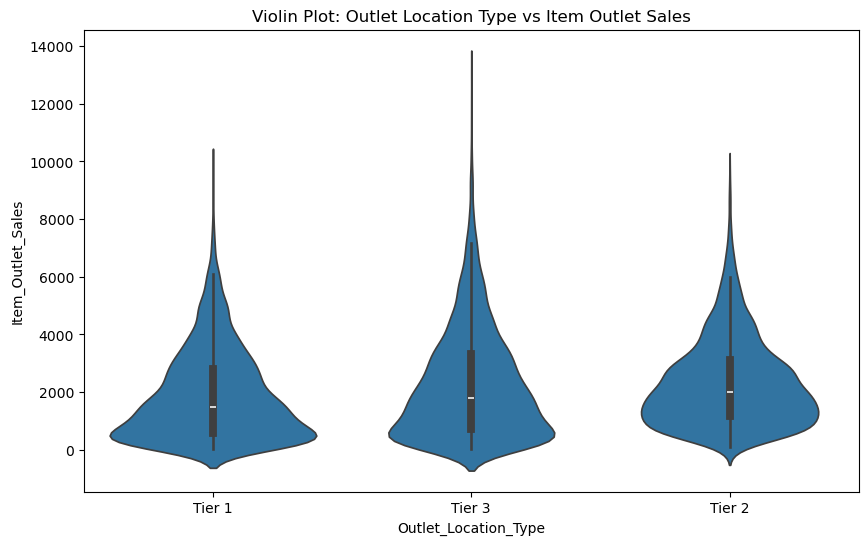

In [180]:
plt.figure(figsize=(10, 6))
sns.violinplot(x= df['Outlet_Location_Type'], y= df['Item_Outlet_Sales'])
plt.title("Violin Plot: Outlet Location Type vs Item Outlet Sales")
plt.show()

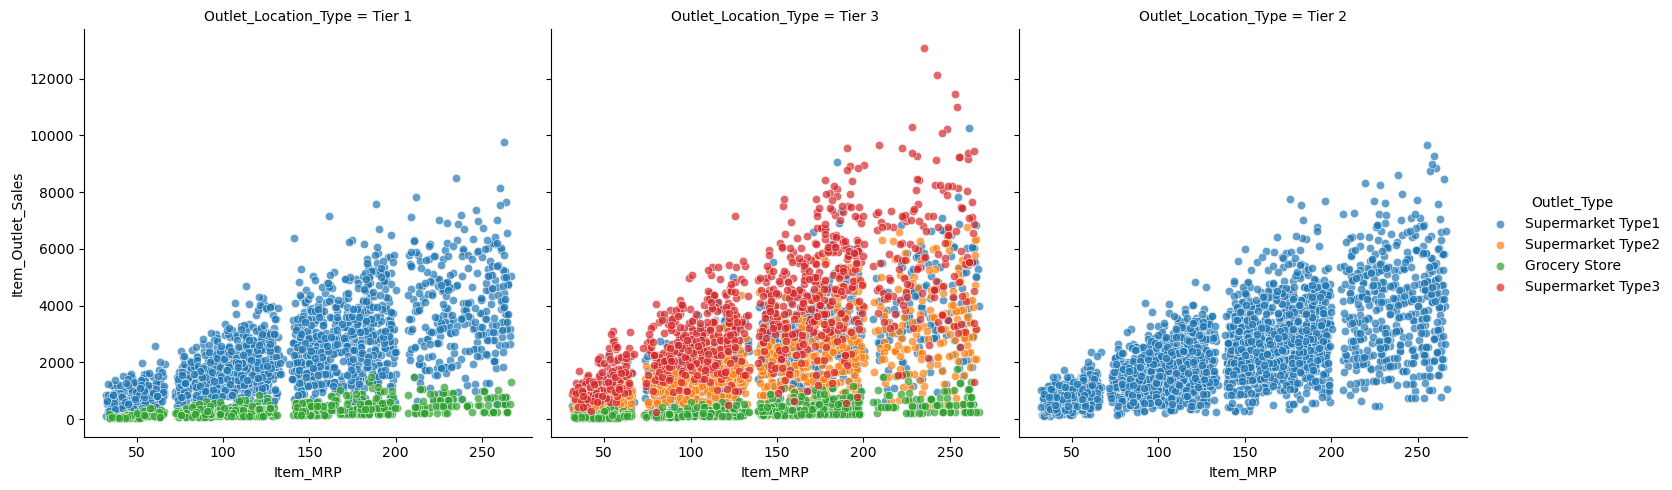

In [181]:
g = sns.FacetGrid(df, col="Outlet_Location_Type", hue="Outlet_Type", height=5)
g.map(sns.scatterplot, "Item_MRP", "Item_Outlet_Sales", alpha=0.7)
g.add_legend()
plt.show()

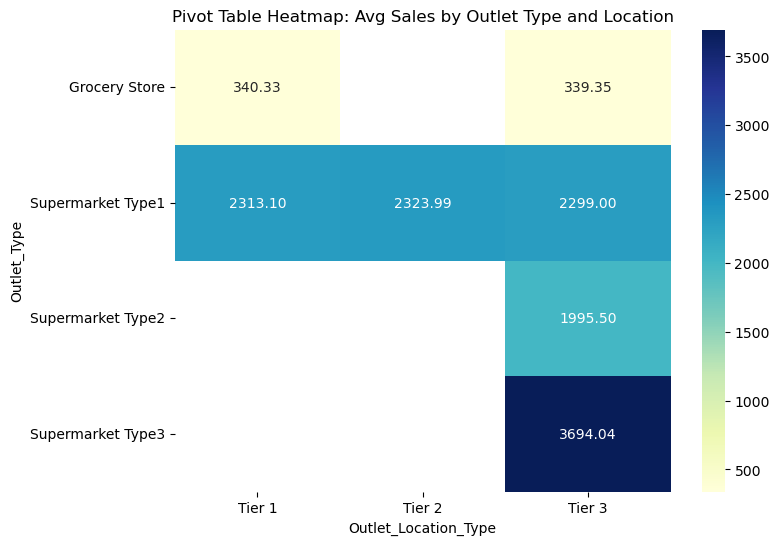

In [182]:
pivot_data = df.pivot_table(values="Item_Outlet_Sales", 
                              index="Outlet_Type", 
                              columns="Outlet_Location_Type", 
                              aggfunc="mean")
plt.figure(figsize=(8,6))
sns.heatmap(pivot_data, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Pivot Table Heatmap: Avg Sales by Outlet Type and Location")
plt.show()

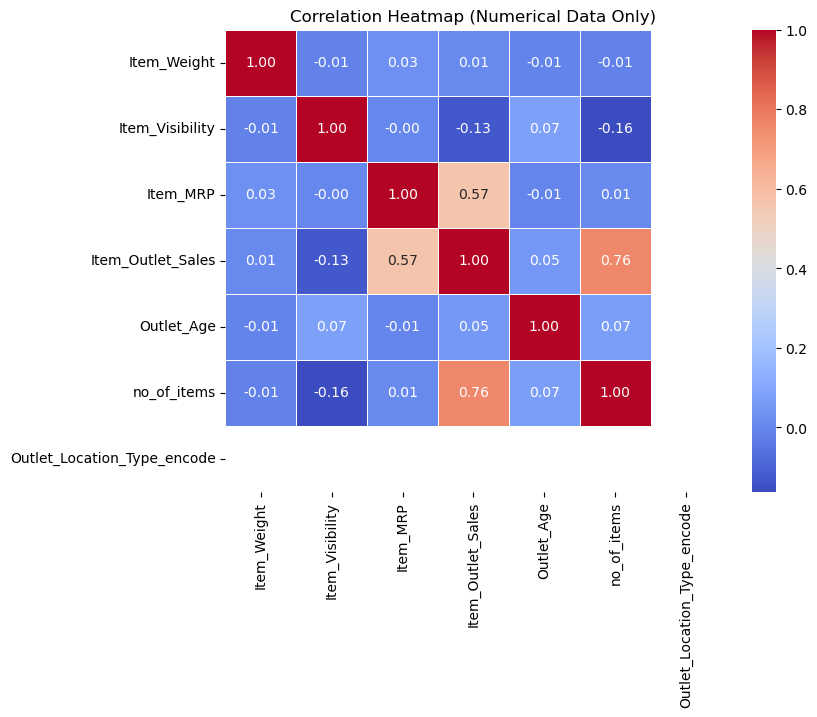

In [183]:
num_data = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = num_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Numerical Data Only)")
plt.show()

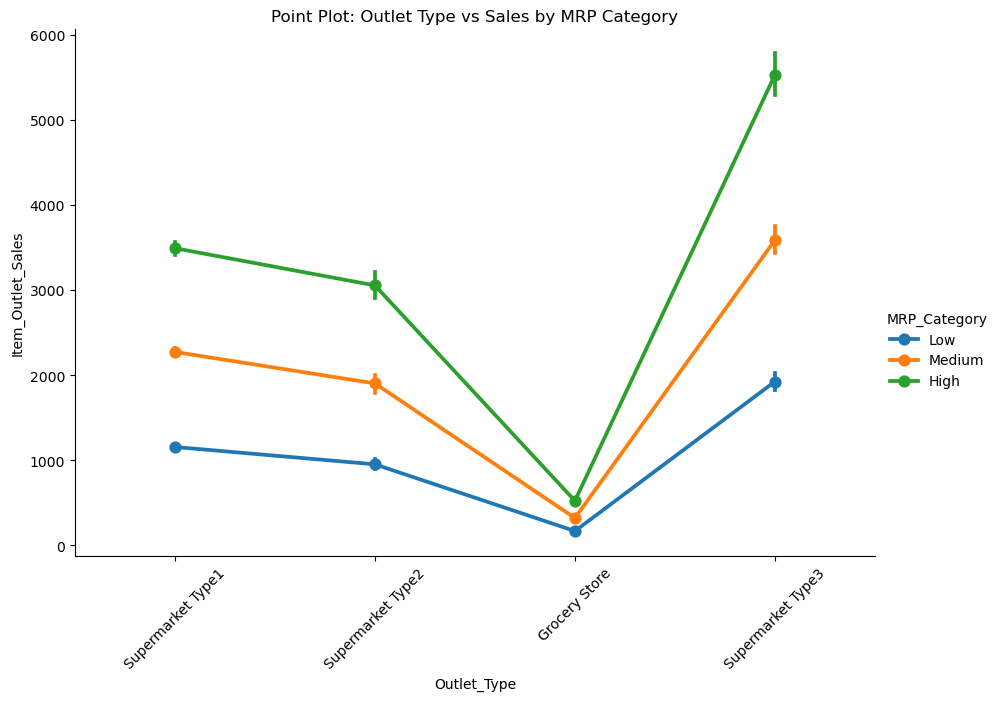

In [184]:
sns.catplot(
    x="Outlet_Type", 
    y="Item_Outlet_Sales", 
    hue="MRP_Category", 
    data=df, 
    kind="point", 
    height=6, 
    aspect=1.5
)
plt.title("Point Plot: Outlet Type vs Sales by MRP Category")
plt.xticks(rotation=45)
plt.show()

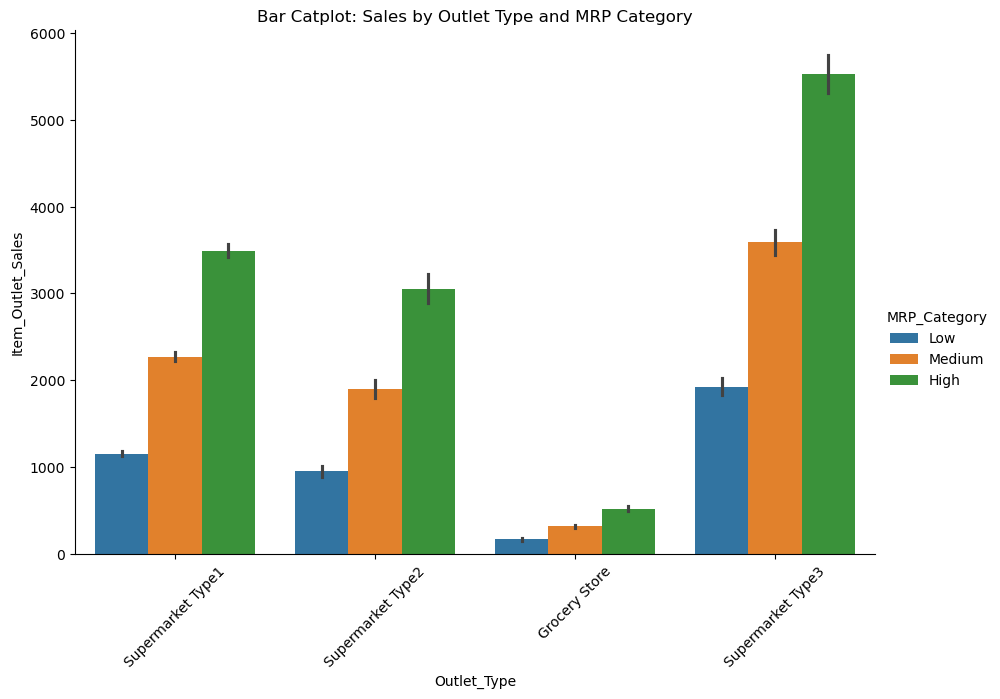

In [185]:
sns.catplot(
    x="Outlet_Type", 
    y="Item_Outlet_Sales", 
    hue="MRP_Category", 
    data=df, 
    kind="bar", 
    height=6, 
    aspect=1.5
)
plt.title("Bar Catplot: Sales by Outlet Type and MRP Category")
plt.xticks(rotation=45)
plt.show()

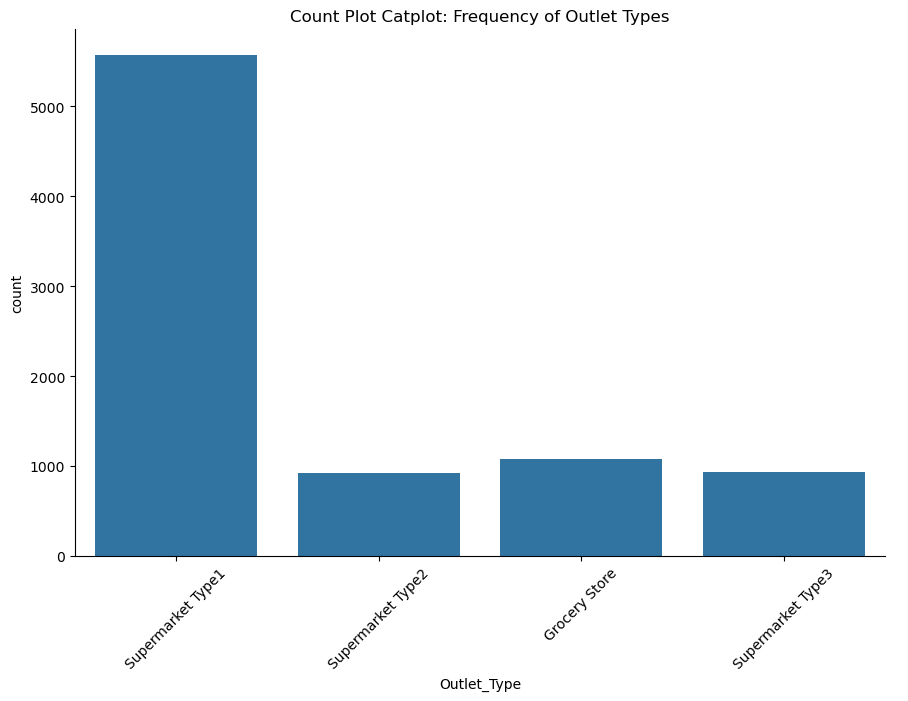

In [186]:
sns.catplot(
    x="Outlet_Type", 
    data=df, 
    kind="count", 
    height=6, 
    aspect=1.5
)
plt.title("Count Plot Catplot: Frequency of Outlet Types")
plt.xticks(rotation=45)
plt.show()

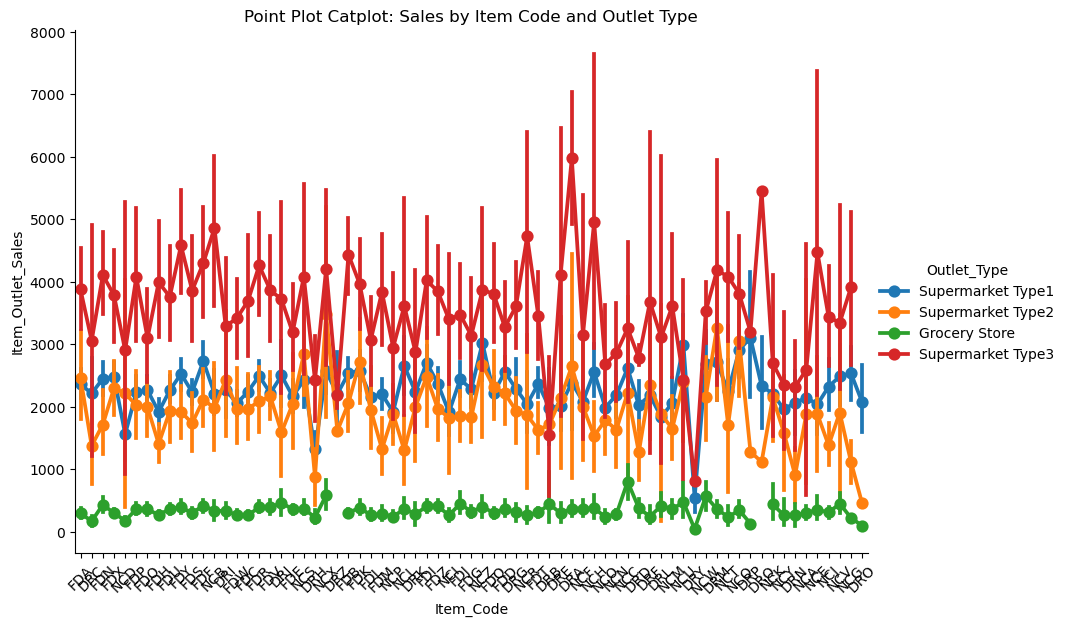

In [187]:
sns.catplot(
    x="Item_Code", 
    y="Item_Outlet_Sales", 
    hue="Outlet_Type", 
    data=df, 
    kind="point", 
    height=6, 
    aspect=1.5
)
plt.title("Point Plot Catplot: Sales by Item Code and Outlet Type")
plt.xticks(rotation=45)
plt.show()

In [188]:
df

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

     Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                   1999-01-01      Medium               Tier 1   
1                   2009-01-01      Medium               Tier 3   
2                   1999-01-01      Medium               Tier 1   
3                   1998-01-01     Unknown               Tier 3   
4                   1987-01-01        High               Tier 3   
...                        ...         ...                  ...   
8518                1987-01-01        High               Tier 3   
8519                2002-01-01     Unknown               Tier 2   
8520                2004-01-01       Small               Tier 2   
8521                2009-01-01      Medium               Tier 3   
8522                1997-01-01       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  Outlet_Age Item_Code  no_of_items  \
0     Supermarket Type1          3735.1380          26       FDA    14.951963   
1     Supermarket Type2           443.4228          16       DRC     9.186454   
2     Supermarket Type1          2097.2700          26       FDN    14.809346   
3         Grocery Store           732.3800          27       FDX     4.021967   
4     Supermarket Type1           994.7052          38       NCD    18.467868   
...                 ...                ...         ...       ...          ...   
8518  Supermarket Type1          2778.3834          38       FDF    12.951520   
8519  Supermarket Type1           549.2850          23       FDS     5.078589   
8520  Supermarket Type1          1193.1136          21       NCJ    14.016447   
8521  Supermarket Type2          1845.5976          16       FDN    17.895281   
8522  Supermarket Type1           765.6700          28       DRG    10.145759   

     Visibility_Category MRP_Category  Outlet_Location_Type_encode  
0                    Low         High                          NaN  
1                    Low          Low                          NaN  
2                    Low       Medium                          NaN  
3                    Low         High                          NaN  
4                    Low          Low                          NaN  
...                  ...          ...                          ...  
8518              Medium         High                          NaN  
8519              Medium       Medium                          NaN  
8520              Medium          Low       

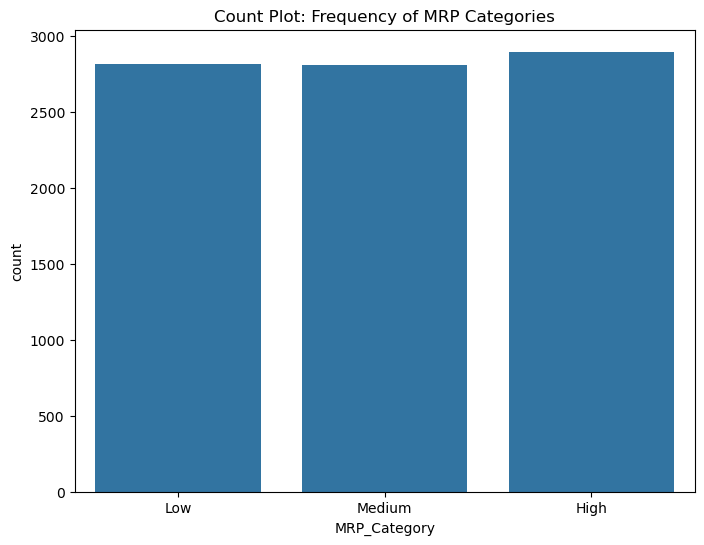

In [189]:
plt.figure(figsize=(8, 6))
sns.countplot(x="MRP_Category", data=df)
plt.title("Count Plot: Frequency of MRP Categories")
plt.show()

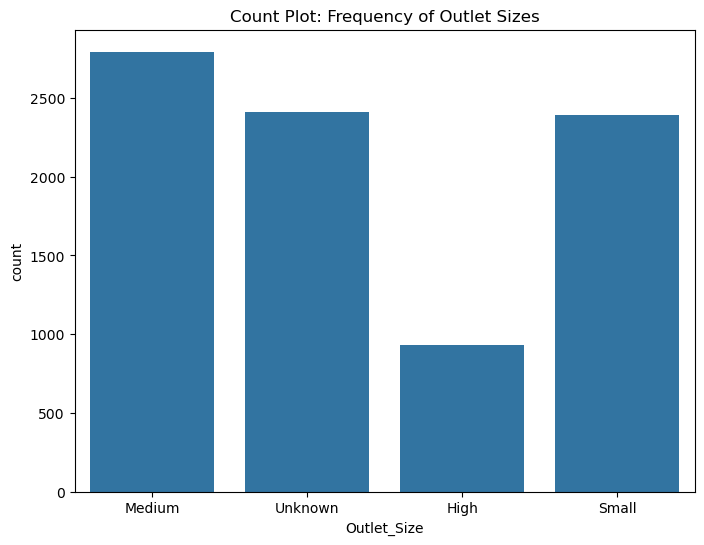

In [190]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Outlet_Size", data=df)
plt.title("Count Plot: Frequency of Outlet Sizes")
plt.show()

In [191]:
data = df.copy()

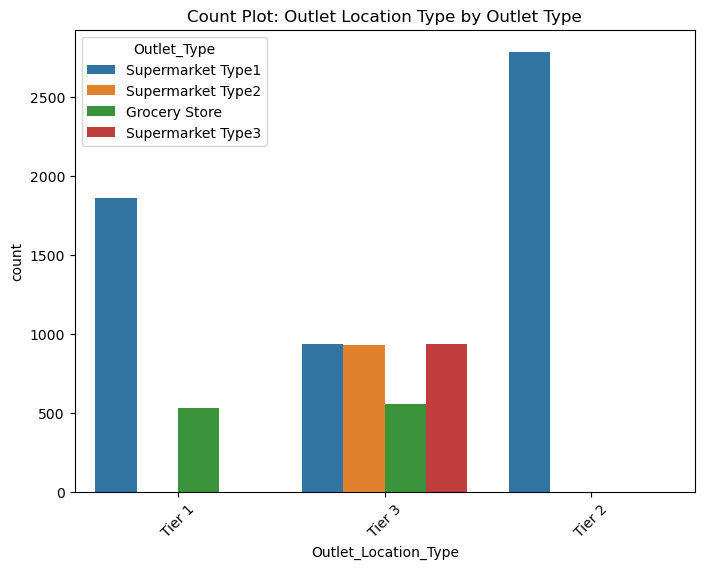

In [192]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Outlet_Location_Type", hue="Outlet_Type", data=data)
plt.title("Count Plot: Outlet Location Type by Outlet Type")
plt.xticks(rotation=45)
plt.show()

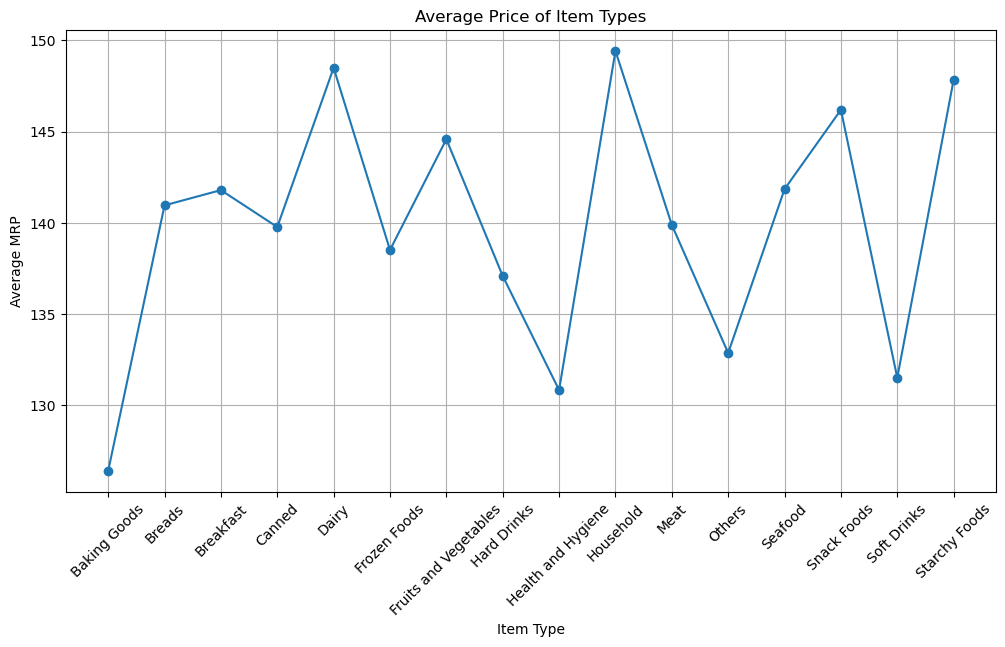

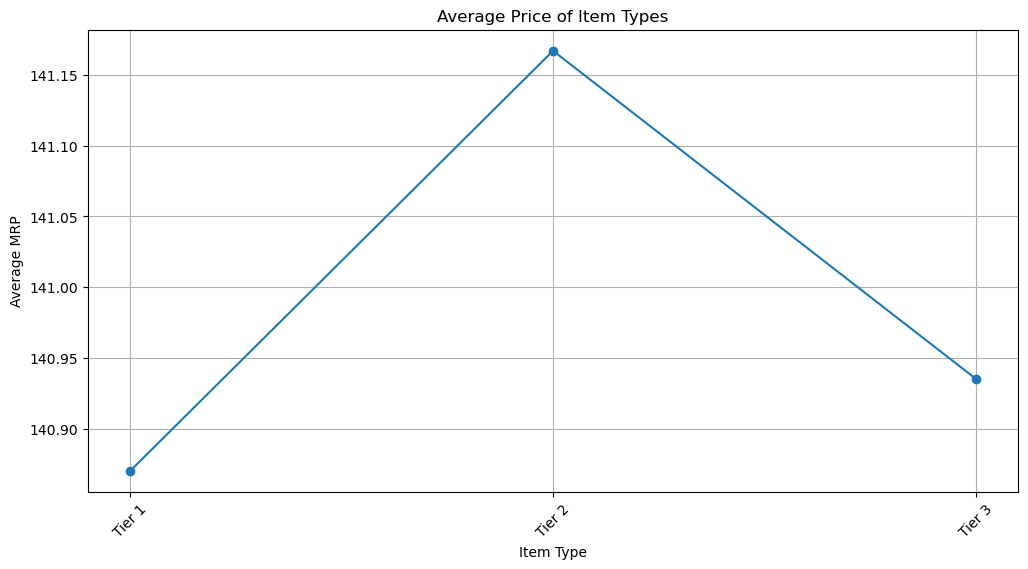

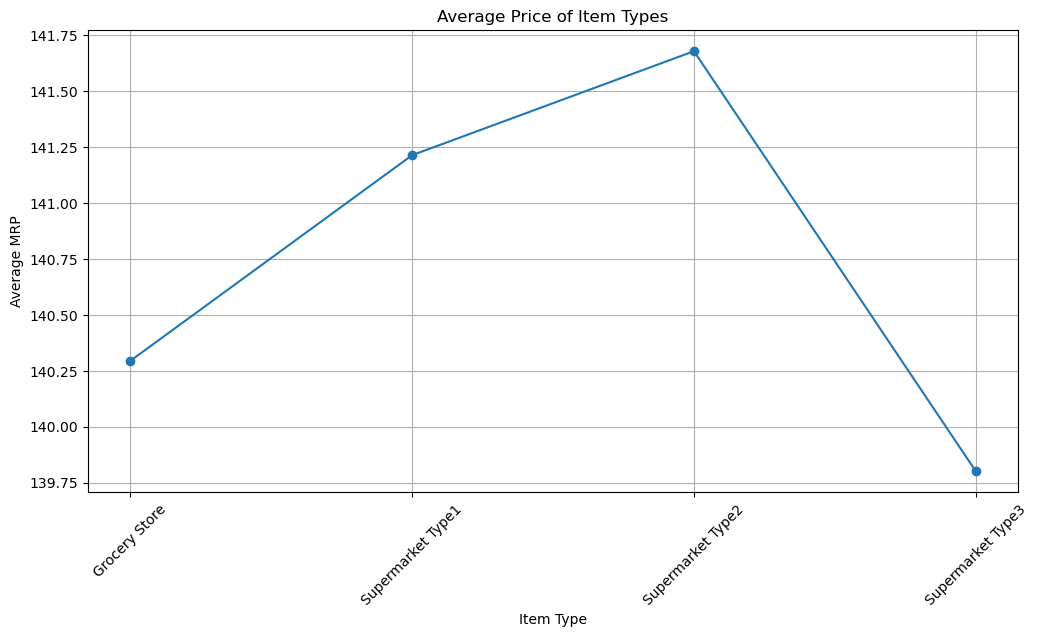

In [193]:
avg_price = data.groupby('Item_Type')['Item_MRP'].mean().reset_index()

# Plot the average price for each item type on a line plot
plt.figure(figsize=(12,6))
plt.plot(avg_price['Item_Type'], avg_price['Item_MRP'], marker='o', linestyle='-')
plt.title('Average Price of Item Types')
plt.xlabel('Item Type')
plt.ylabel('Average MRP')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
avg_price = data.groupby('Outlet_Location_Type')['Item_MRP'].mean().reset_index()

# Plot the average price for each item type on a line plot
plt.figure(figsize=(12,6))
plt.plot(avg_price['Outlet_Location_Type'], avg_price['Item_MRP'], marker='o', linestyle='-')
plt.title('Average Price of Item Types')
plt.xlabel('Item Type')
plt.ylabel('Average MRP')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
plt.figure(figsize=(12,6))
avg_price = data.groupby('Outlet_Type')['Item_MRP'].mean().reset_index()
plt.plot(avg_price['Outlet_Type'], avg_price['Item_MRP'], marker='o', linestyle='-')
plt.title('Average Price of Item Types')
plt.xlabel('Item Type')
plt.ylabel('Average MRP')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

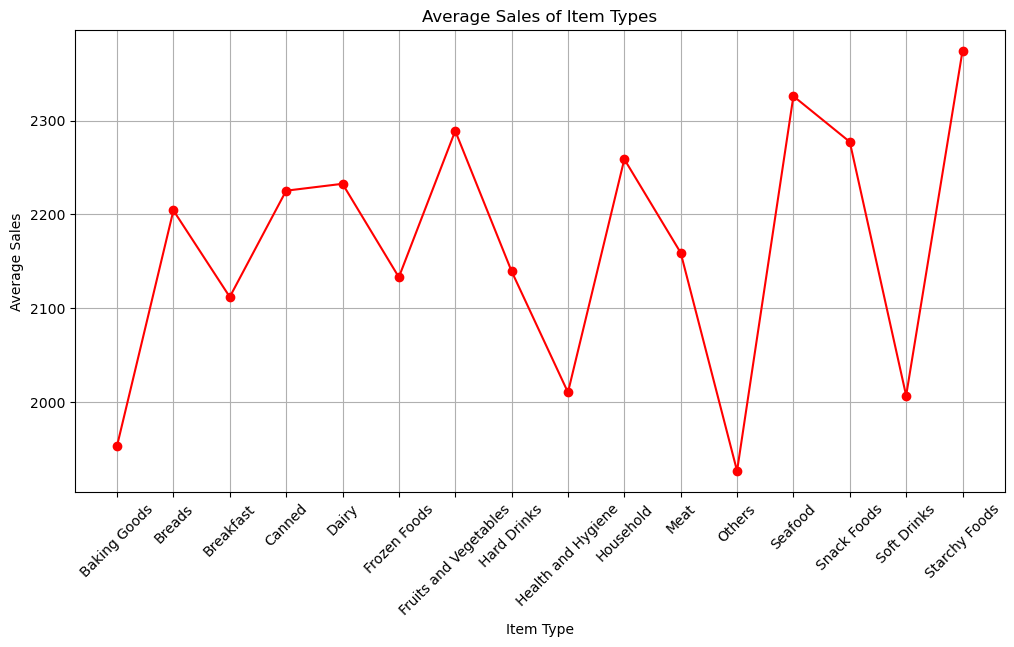

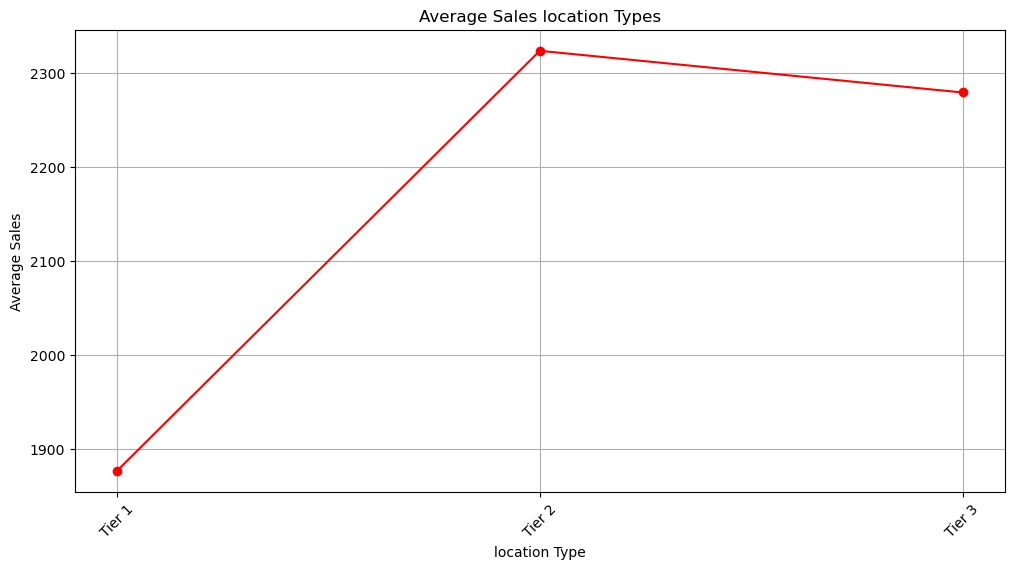

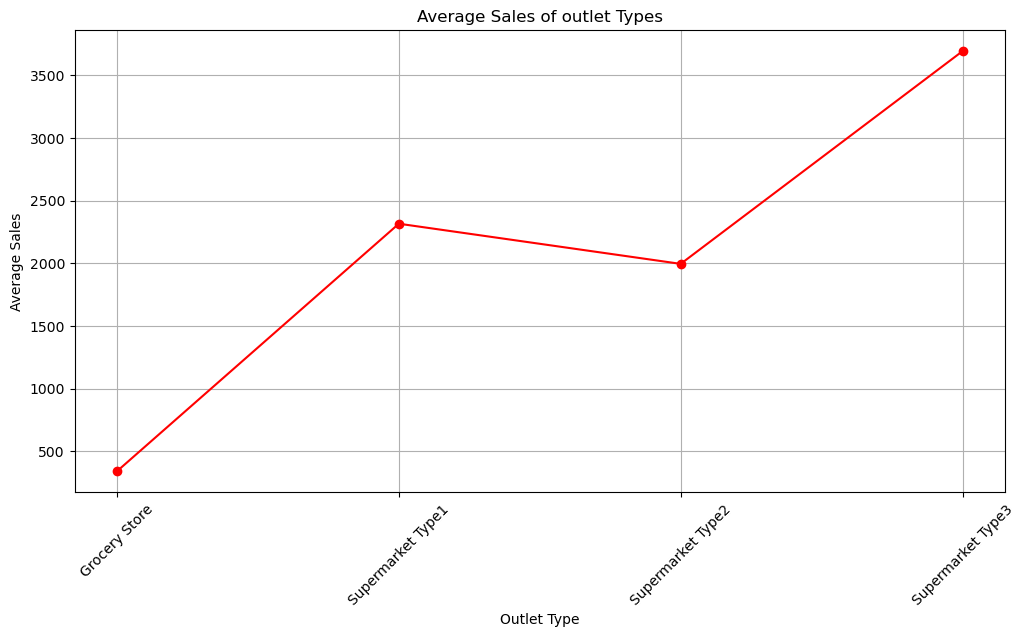

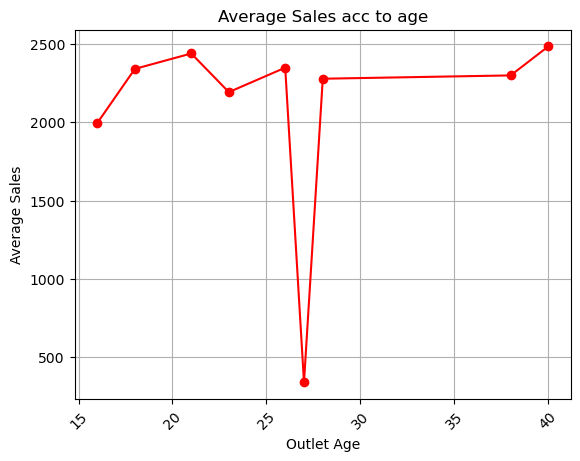

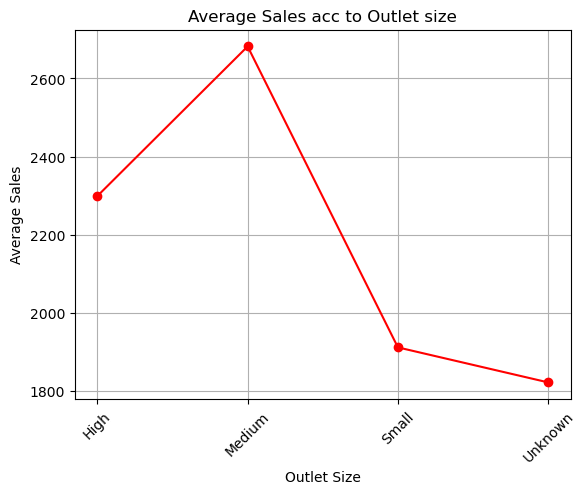

In [194]:
avg_sales = data.groupby('Item_Type')['Item_Outlet_Sales'].mean().reset_index()

# Plot the average price for each item type on a line plot
plt.figure(figsize=(12,6))
plt.plot(avg_sales['Item_Type'], avg_sales['Item_Outlet_Sales'], marker='o', linestyle='-',color='red')
plt.title('Average Sales of Item Types')
plt.xlabel('Item Type')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
avg_sales = data.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().reset_index()

# Plot the average price for each item type on a line plot
plt.figure(figsize=(12,6))
plt.plot(avg_sales['Outlet_Location_Type'], avg_sales['Item_Outlet_Sales'], marker='o', linestyle='-',color='red')
plt.title('Average Sales location Types')
plt.xlabel('location Type')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
plt.figure(figsize=(12,6))
avg_sales = data.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().reset_index()
plt.plot(avg_sales['Outlet_Type'], avg_sales['Item_Outlet_Sales'], marker='o', linestyle='-',color='red')
plt.title('Average Sales of outlet Types')
plt.xlabel('Outlet Type')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
avg_sales = data.groupby('Outlet_Age')['Item_Outlet_Sales'].mean().reset_index()
plt.plot(avg_sales['Outlet_Age'], avg_sales['Item_Outlet_Sales'], marker='o', linestyle='-',color='red')
plt.title('Average Sales acc to age')
plt.xlabel('Outlet Age')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
avg_sales = data.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().reset_index()
plt.plot(avg_sales['Outlet_Size'], avg_sales['Item_Outlet_Sales'], marker='o', linestyle='-',color='red')
plt.title('Average Sales acc to Outlet size')
plt.xlabel('Outlet Size')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

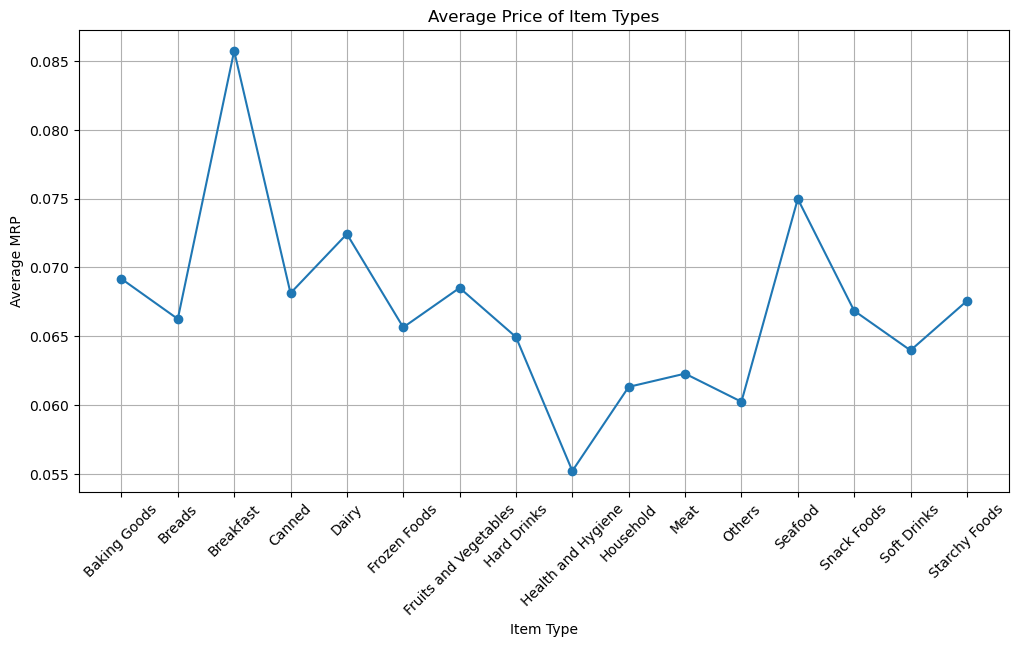

In [195]:
avg_price = data.groupby('Item_Type')['Item_Visibility'].mean().reset_index()

# Plot the average price for each item type on a line plot
plt.figure(figsize=(12,6))
plt.plot(avg_price['Item_Type'], avg_price['Item_Visibility'], marker='o', linestyle='-')
plt.title('Average Price of Item Types')
plt.xlabel('Item Type')
plt.ylabel('Average MRP')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

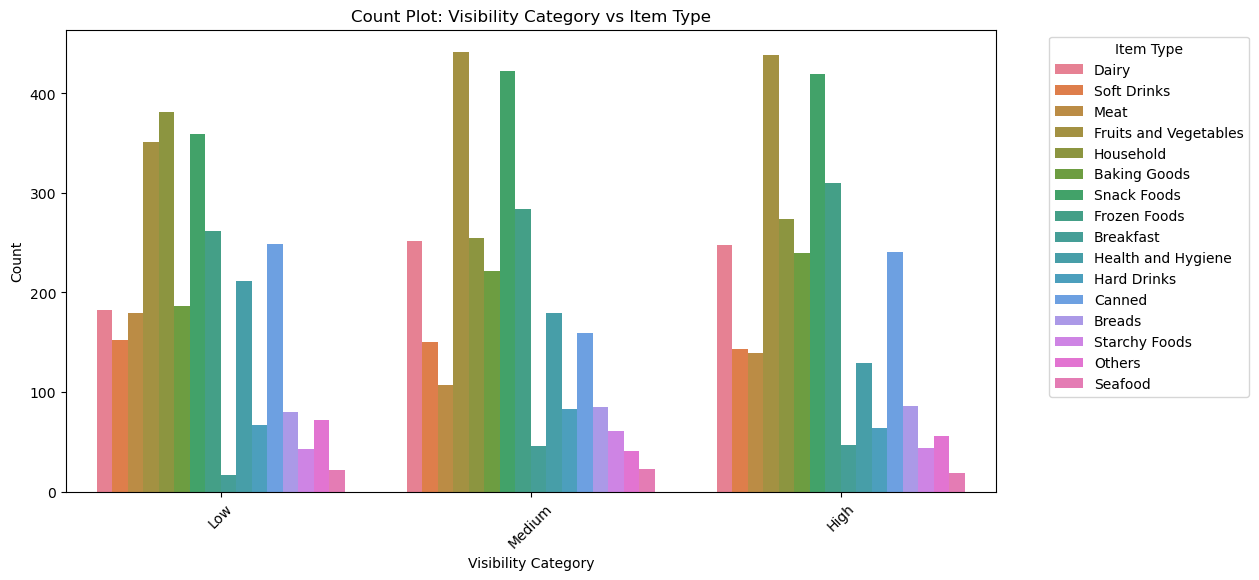

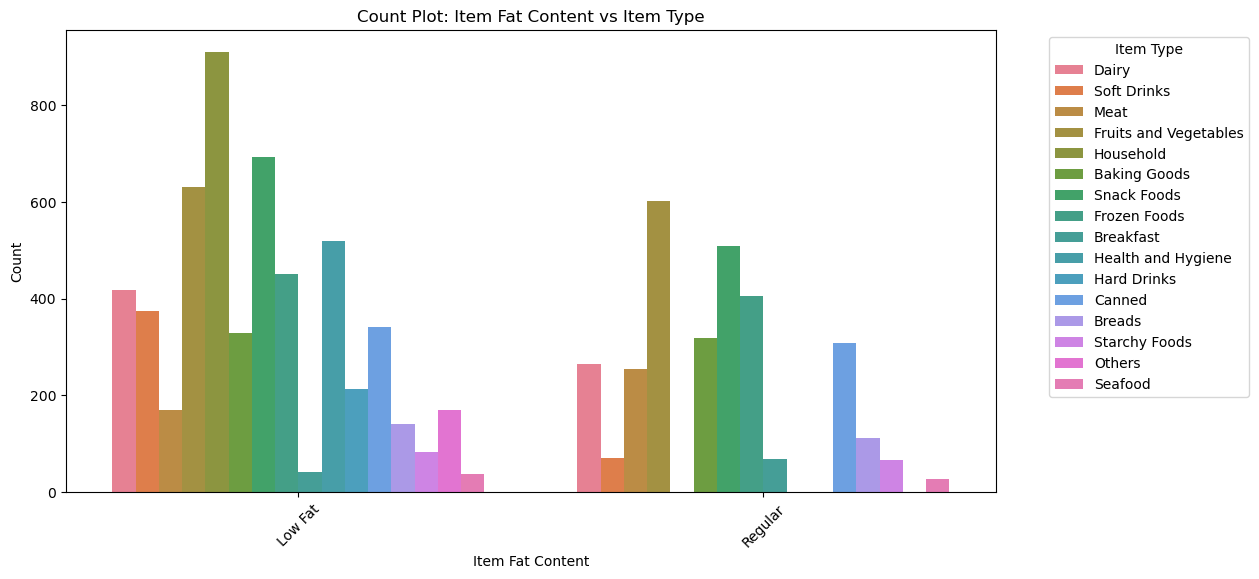

In [196]:

# Create a count plot for Visibility_Category vs Item_Type
plt.figure(figsize=(12,6))
sns.countplot(x='Visibility_Category', hue='Item_Type', data=data)
plt.title('Count Plot: Visibility Category vs Item Type')
plt.xlabel('Visibility Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title="Item Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
plt.figure(figsize=(12,6))
sns.countplot(x='Item_Fat_Content', hue='Item_Type', data=data)
plt.title('Count Plot: Item Fat Content vs Item Type')
plt.xlabel('Item Fat Content')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title="Item Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [197]:
df = df.drop(columns=['Item_Identifier', 'Outlet_Identifier', 'Outlet_Location_Type_encode'])

In [198]:
data

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

     Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                   1999-01-01      Medium               Tier 1   
1                   2009-01-01      Medium               Tier 3   
2                   1999-01-01      Medium               Tier 1   
3                   1998-01-01     Unknown               Tier 3   
4                   1987-01-01        High               Tier 3   
...                        ...         ...                  ...   
8518                1987-01-01        High               Tier 3   
8519                2002-01-01     Unknown               Tier 2   
8520                2004-01-01       Small               Tier 2   
8521                2009-01-01      Medium               Tier 3   
8522                1997-01-01       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  Outlet_Age Item_Code  no_of_items  \
0     Supermarket Type1          3735.1380          26       FDA    14.951963   
1     Supermarket Type2           443.4228          16       DRC     9.186454   
2     Supermarket Type1          2097.2700          26       FDN    14.809346   
3         Grocery Store           732.3800          27       FDX     4.021967   
4     Supermarket Type1           994.7052          38       NCD    18.467868   
...                 ...                ...         ...       ...          ...   
8518  Supermarket Type1          2778.3834          38       FDF    12.951520   
8519  Supermarket Type1           549.2850          23       FDS     5.078589   
8520  Supermarket Type1          1193.1136          21       NCJ    14.016447   
8521  Supermarket Type2          1845.5976          16       FDN    17.895281   
8522  Supermarket Type1           765.6700          28       DRG    10.145759   

     Visibility_Category MRP_Category  Outlet_Location_Type_encode  
0                    Low         High                          NaN  
1                    Low          Low                          NaN  
2                    Low       Medium                          NaN  
3                    Low         High                          NaN  
4                    Low          Low                          NaN  
...                  ...          ...                          ...  
8518              Medium         High                          NaN  
8519              Medium       Medium                          NaN  
8520              Medium          Low       